# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

-----

# IMPORTANTE: CAMBIAR NOMBRES TRAIN Y TEST PARA RESERVAS Y CANCELACIONES

# Prophet

## Analisis Serie Reservas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [14]:
# Para prohet, dejamos el dataframe sin indice y con dos columnas ds para fecha e y para valores.

df_w_r = pd.read_csv('df_reservas.csv')
df_w_r.columns = ['ds', 'y']
df_w_r.tail()

,ds,y
109,2017-08-06,703
110,2017-08-13,717
111,2017-08-20,797
112,2017-08-27,678
113,2017-09-03,349


<Axes: >

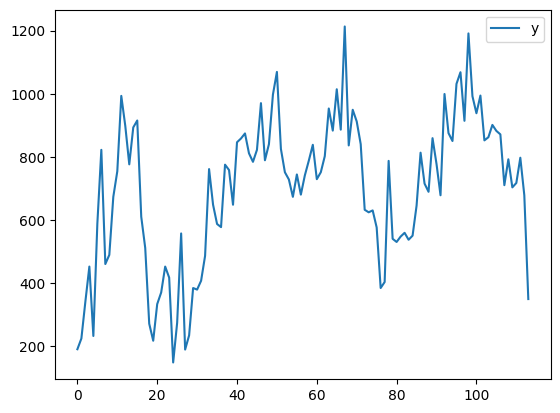

In [15]:
import matplotlib.pyplot as plt
df_w_r.plot()

In [16]:
train = df_w_r.iloc[:110,:]
test = df_w_r.iloc[110:,:]

In [17]:
test

,ds,y
110,2017-08-13,717
111,2017-08-20,797
112,2017-08-27,678
113,2017-09-03,349


In [18]:
prophet_m = Prophet()
prophet_m.fit(train)

12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = prophet_m.make_future_dataframe(periods=len(test))
forecast = prophet_m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-05,475.868391,309.664576,602.724131,475.868391,475.868391,-10.408448,-10.408448,-10.408448,-10.408448,-10.408448,-10.408448,0.0,0.0,0.0,465.459943
1,2015-07-12,480.664727,255.876717,543.559135,480.664727,480.664727,-83.310748,-83.310748,-83.310748,-83.310748,-83.310748,-83.310748,0.0,0.0,0.0,397.353978
2,2015-07-19,485.461062,218.166806,497.838478,485.461062,485.461062,-126.534639,-126.534639,-126.534639,-126.534639,-126.534639,-126.534639,0.0,0.0,0.0,358.926423
3,2015-07-26,490.257398,237.207883,518.352910,490.257398,490.257398,-109.393142,-109.393142,-109.393142,-109.393142,-109.393142,-109.393142,0.0,0.0,0.0,380.864255
4,2015-08-02,495.053733,321.463516,602.105282,495.053733,495.053733,-40.867899,-40.867899,-40.867899,-40.867899,-40.867899,-40.867899,0.0,0.0,0.0,454.185834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2017-08-06,875.140115,723.519630,1018.196430,875.140115,875.140115,7.439490,7.439490,7.439490,7.439490,7.439490,7.439490,0.0,0.0,0.0,882.579605
110,2017-08-07,875.540040,756.530474,1014.270196,875.540040,875.540040,16.644730,16.644730,16.644730,16.644730,16.644730,16.644730,0.0,0.0,0.0,892.184770
111,2017-08-08,875.939964,760.093845,1044.027271,875.939964,875.939964,24.987384,24.987384,24.987384,24.987384,24.987384,24.987384,0.0,0.0,0.0,900.927348
112,2017-08-09,876.339888,758.017061,1046.854605,876.339888,876.339888,32.363701,32.363701,32.363701,32.363701,32.363701,32.363701,0.0,0.0,0.0,908.703589


In [25]:
from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[110:,'yhat'])))

-2.5636145090697795


In [24]:
list(test['y'])

[717, 797, 678, 349]

In [23]:
list(forecast.loc[110:,'yhat'])

[892.1847696272914, 900.9273476538298, 908.703589250394, 915.4345899128913]

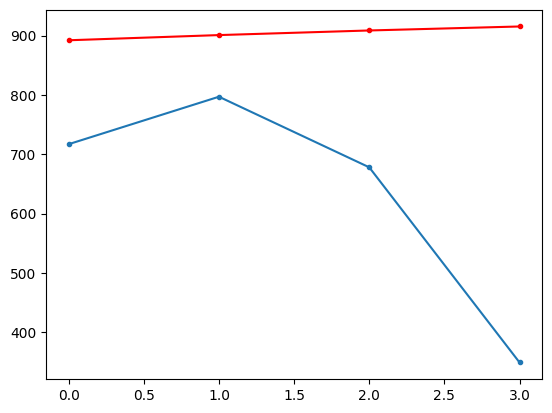

In [27]:
import matplotlib.pyplot as plt
plt.plot(list(test['y']),'.-')
plt.plot(list(forecast.loc[110:,'yhat']),'r.-')
plt.show()
